This is a project that I created when I first started studying Data Science in July 2019. This project is my final result from `Big Data Analytics Training` that was held by `Digital Talent Scholarship - Ministry of Communication and Informatic`.

The project I'm trying to work on is crawling data from the `Goodreads-Best Books of the Decade: 2010s (2010-2019)` website. Apart from that, I also did some simple analysis with the data.

### Crawling Proccess

First of all, I'll be crawling the data from `Goodreads-Best Books of the Decade: 2010s (2010-2019)` website. The data is include titles, authors, ratings, scores, and voteds.

In [1]:
%%capture
! pip intall seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from requests import get
from bs4 import BeautifulSoup
from time import sleep
from time import time
from random import randint
from scipy import stats
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# Prepare the list for each data
titles = []
authors = []
ratings = []
scores = []
voteds = []

In [3]:
start_time = time()
requests = 0

In [4]:
pages = [str(i) for i in range(1,68)]

In [5]:
# Crawling proccess
for page in pages:       
    url = 'https://www.goodreads.com/list/show/4093.Best_Books_of_the_Decade_2010_s?page='+page
    print(url)
    response = get(url)
    
    sleep(randint(10,25))
    
    requests += 1
    elapsed_time = time() - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
    
    soup = BeautifulSoup(response.text, 'html.parser')
    
    book_title_list = soup.find_all('a', class_='bookTitle')
    for book_title in book_title_list:
        title = book_title.span.text
        titles.append(title)
        
    author_list = soup.find_all('a', class_='authorName')
    for author_name in author_list:
        author = author_name.span.text
        authors.append(author)
        
    rating_list = soup.find_all('span', class_='minirating')
    for book_rating in rating_list:
        rating = book_rating.text[1:5]
        ratings.append(rating)
        
    score_list = soup.find_all('span', class_='smallText uitext')
    for book_score in score_list:
        score = book_score.a.text[7:]
        scores.append(score)
        
    voted_list = soup.find_all('span', class_='smallText uitext')
    for people_voted in voted_list:
        voted = people_voted.text[29:53]
        voteds.append(voted)

https://www.goodreads.com/list/show/4093.Best_Books_of_the_Decade_2010_s?page=1
Request: 1; Frequency: 0.0328238973020485 requests/s
https://www.goodreads.com/list/show/4093.Best_Books_of_the_Decade_2010_s?page=2
Request: 2; Frequency: 0.030171563801925465 requests/s
https://www.goodreads.com/list/show/4093.Best_Books_of_the_Decade_2010_s?page=3
Request: 3; Frequency: 0.029753966014098018 requests/s
https://www.goodreads.com/list/show/4093.Best_Books_of_the_Decade_2010_s?page=4
Request: 4; Frequency: 0.03249111547337663 requests/s
https://www.goodreads.com/list/show/4093.Best_Books_of_the_Decade_2010_s?page=5
Request: 5; Frequency: 0.033863828681107495 requests/s
https://www.goodreads.com/list/show/4093.Best_Books_of_the_Decade_2010_s?page=6
Request: 6; Frequency: 0.03474800330412936 requests/s
https://www.goodreads.com/list/show/4093.Best_Books_of_the_Decade_2010_s?page=7
Request: 7; Frequency: 0.03661505754404091 requests/s
https://www.goodreads.com/list/show/4093.Best_Books_of_the_D

Request: 61; Frequency: 0.03797110764746519 requests/s
https://www.goodreads.com/list/show/4093.Best_Books_of_the_Decade_2010_s?page=62
Request: 62; Frequency: 0.037963522248604734 requests/s
https://www.goodreads.com/list/show/4093.Best_Books_of_the_Decade_2010_s?page=63
Request: 63; Frequency: 0.037885286995292984 requests/s
https://www.goodreads.com/list/show/4093.Best_Books_of_the_Decade_2010_s?page=64
Request: 64; Frequency: 0.03774345472763577 requests/s
https://www.goodreads.com/list/show/4093.Best_Books_of_the_Decade_2010_s?page=65
Request: 65; Frequency: 0.037598770728878184 requests/s
https://www.goodreads.com/list/show/4093.Best_Books_of_the_Decade_2010_s?page=66
Request: 66; Frequency: 0.0374604344821231 requests/s
https://www.goodreads.com/list/show/4093.Best_Books_of_the_Decade_2010_s?page=67
Request: 67; Frequency: 0.0375107316043945 requests/s


### DataFrame

The data that has been successfully retrieved by crawling will then be saved into a goodreads table with csv format. In addition, the data cleaning process will be carried out to obtain appropriate data to enter the analysis process.

In [6]:
# Make a new DataFrame
goodreads = pd.DataFrame({'Book Title': titles,
                          'Author': authors,
                          'Rating': ratings,
                          'Score': scores,
                          'People Voted': voteds})

In [7]:
# Save file to .csv format
goodreads.to_csv('Goodreads.csv')

In [8]:
df = pd.read_csv('Goodreads.csv')
df.head()

,Unnamed: 0,Book Title,Author,Rating,Score,People Voted
0,0,The Fault in Our Stars,John Green,4.20,"202,279","and\n2,050 people voted"
1,1,"Divergent (Divergent, #1)",Veronica Roth,4.19,"146,912","and\n1,502 people voted"
2,2,"Mockingjay (The Hunger Games, #3)",Suzanne Collins,4.04,"141,868","and\n1,454 people voted"
3,3,Gone Girl,Gillian Flynn,4.08,"125,694","and\n1,282 people voted"
4,4,The Martian,Andy Weir,4.40,"122,769","and\n1,251 people voted"


### Cleaning Proccess

In [9]:
del df['Unnamed: 0']
df['Score'] = df['Score'].str.replace(r'\D', '')
df['Score'] = df['Score'].astype(np.int64)
df['Rating'] = df['Rating'].str.replace('eall','4.00')
df['Rating'] = df['Rating'].str.replace('t wa','5.00')
df['Rating'] = df['Rating'].str.replace('iked','3.00')
df['Rating'] = df['Rating'].str.replace(r'\D', '')
df['Rating'] = df['Rating'].astype(np.int64)
df['Rating'] = df['Rating']/100
df['People Voted'] = df['People Voted'].str.replace(r'\D', '')
df['People Voted'] = df['People Voted'].astype(np.int64)

In [10]:
df.head()

,Book Title,Author,Rating,Score,People Voted
0,The Fault in Our Stars,John Green,4.20,202279,2050
1,"Divergent (Divergent, #1)",Veronica Roth,4.19,146912,1502
2,"Mockingjay (The Hunger Games, #3)",Suzanne Collins,4.04,141868,1454
3,Gone Girl,Gillian Flynn,4.08,125694,1282
4,The Martian,Andy Weir,4.40,122769,1251


### Analysis Proccess

#### Number of Author

In [11]:
df.Author.nunique()

4255

From the data we have reviewed and cleaned, we can see that in the 2010s (2010-2019) there were 4255 authors whose books became `Best Book of the Decade`.

#### Most Contributors

In [12]:
book_per_author = df[['Book Title', 'Author']].groupby(['Author']).count()
book_per_author.sort_values(by='Book Title', ascending=False).head()

,Book Title
Author,
John Blandly,54
Stephen King,23
Lucian Bane,19
Gena Showalter,16
Brian K. Vaughan,16


Based on the results above, we can find out that the author with the most book contributions in the 2010s (2010-2019) was John Blandly with 54 books.

#### Top 5 Author (by Score)

In [13]:
author_score = df[['Author', 'Score']].groupby(['Author']).mean()
author_score.sort_values(by='Score', ascending=False).head()

,Score
Author,
Suzanne Collins,71780.000000
John Green,69223.333333
Gillian Flynn,62884.000000
Andy Weir,61662.000000
Donna Tartt,56284.000000


The results above show the average score of each author. So that in the future we can recommend books from the top authors (for example the top 5 authors) to enter the list of books on Goodreads.

#### Top 5 Book (by Score)

In [14]:
favorite_book = df[['Book Title', 'Author', 'Score']]
favorite_book.head()

,Book Title,Author,Score
0,The Fault in Our Stars,John Green,202279
1,"Divergent (Divergent, #1)",Veronica Roth,146912
2,"Mockingjay (The Hunger Games, #3)",Suzanne Collins,141868
3,Gone Girl,Gillian Flynn,125694
4,The Martian,Andy Weir,122769


The table above shows the 5 books with the highest scores on the `Goodreads-Best Book of the Decade: 2010s` website. These books have also entered the big screen and become booming films of their time.

In [15]:
# Findings the correlation between Rating, Score, and People_Voted
df[['Rating', 'Score', 'People Voted']].corr()

,Rating,Score,People Voted
Rating,1.000000,0.049532,0.050056
Score,0.049532,1.000000,0.999654
People Voted,0.050056,0.999654,1.000000


Based on the table above, we can see that Score and People Voted have a high correlation.

(0.0, 212392.9)

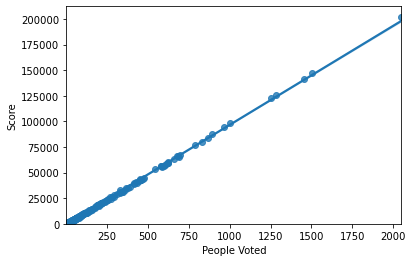

In [16]:
sns.regplot(x='People Voted', y='Score', data=df)
plt.ylim(0,)

In [17]:
pearson_coef, p_value = stats.pearsonr(df['People Voted'], df['Score'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.9996535039599108  with a P-value of P = 0.0


(0.0, 5.25)

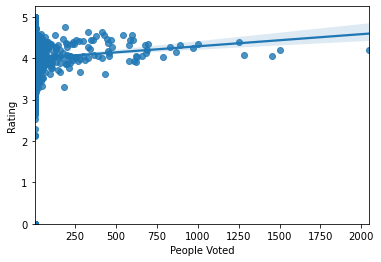

In [18]:
sns.regplot(x='People Voted', y='Rating', data=df)
plt.ylim(0,)

In [19]:
pearson_coef, p_value = stats.pearsonr(df['People Voted'], df['Rating'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.05005616950549138  with a P-value of P = 4.3215186266911494e-05


(0.0, 5.25)

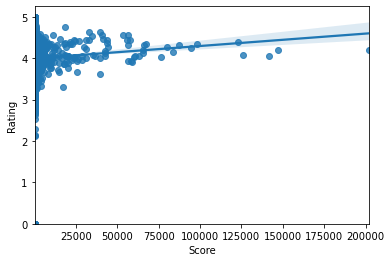

In [20]:
sns.regplot(x='Score', y='Rating', data=df)
plt.ylim(0,)

In [21]:
pearson_coef, p_value = stats.pearsonr(df['Score'], df['Rating'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.04953170777021255  with a P-value of P = 5.1949117115125574e-05
